# IMPORT DEPENDANCIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# DATA COLLECTION

In [6]:
data=pd.read_csv("Breast cancer detection.csv")

# EXPLORATORY DATA ANALYSIS(EDA)

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.drop(columns="Unnamed: 32", axis = 1, inplace = True)  #removing column with Nan values

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.shape #checking number of rows and columns

(569, 32)

In [11]:
data.info()  #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
data.drop(columns="id", axis = 1, inplace = True)  #removing column id as it will not be used

In [13]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Labeling categorical values

As we saw diagnosis has object data type we need to convert it as other values are in continuous format and  for easy process of detection

In [14]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing values in the dataset

In [15]:
data.describe()  # Descriptive statistics of data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Getting the distribution of target variable

In [16]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Encoding DIAGNOSIS COLUMN

In [17]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(data['diagnosis'])
data['labels']=labels
data.drop(columns="diagnosis", axis = 1, inplace = True) 

In [18]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [19]:
data['labels'].value_counts()

0    357
1    212
Name: labels, dtype: int64

# For an imbalanced dataset, Grouping data on target

In [20]:
data.groupby('labels').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
labels,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


<Axes: xlabel='labels', ylabel='count'>

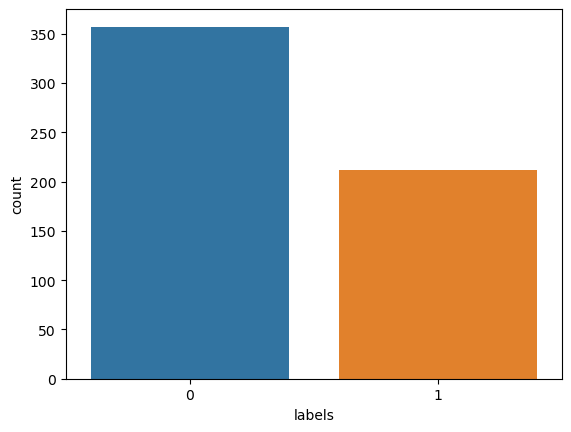

In [21]:
# countplot for the target column for checkin gthe distribution of target
sns.countplot(x='labels', data=data)

Distribution plot for all columns

In [22]:
# this is how we can get all the column names of the dataframe
for column in data:
    print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
labels


/Users/swatilalwani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


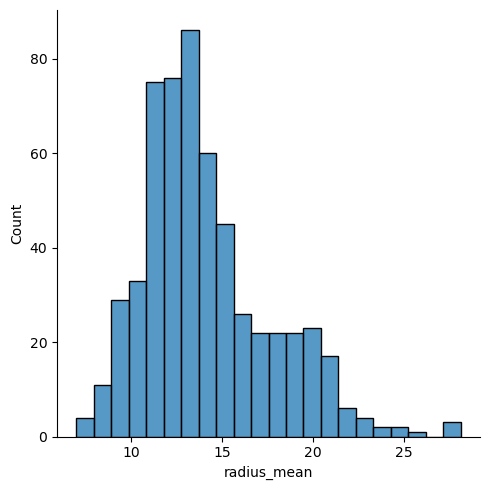

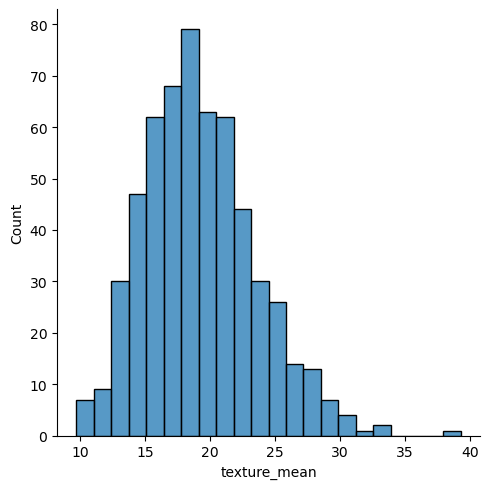

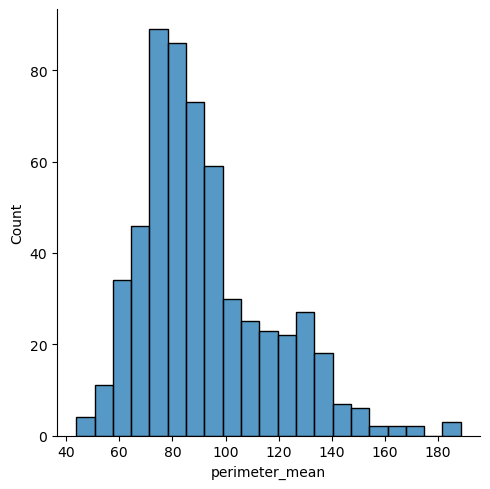

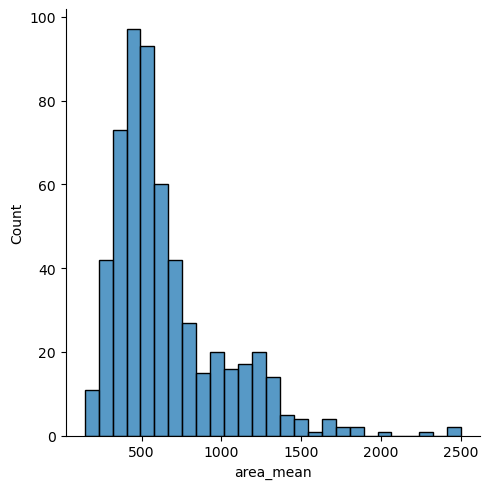

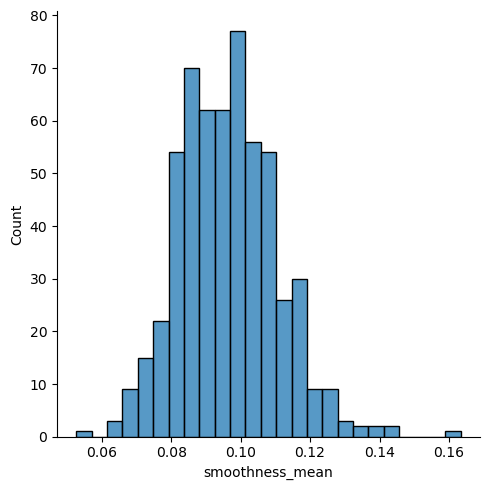

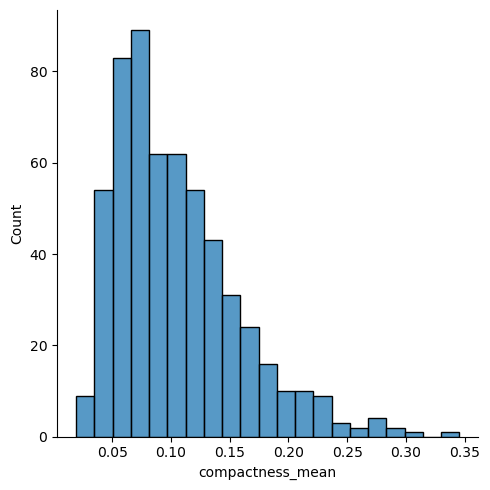

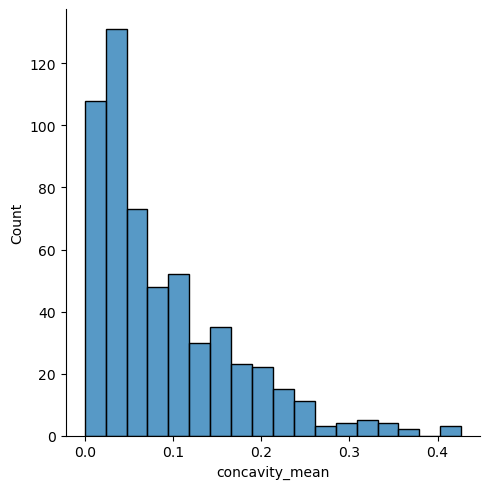

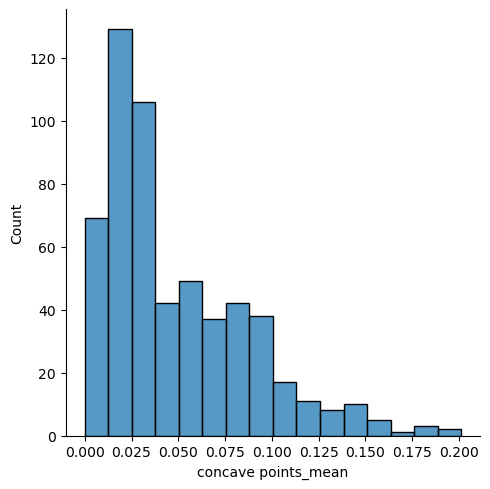

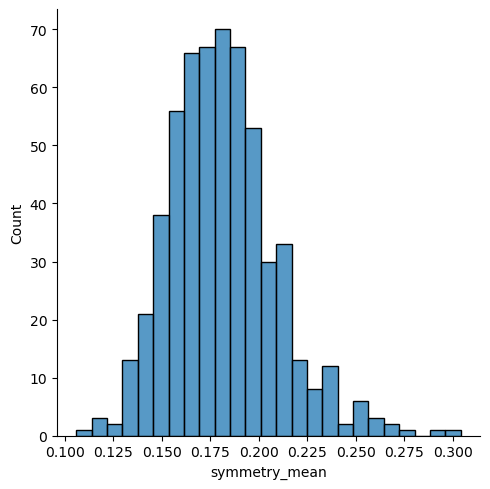

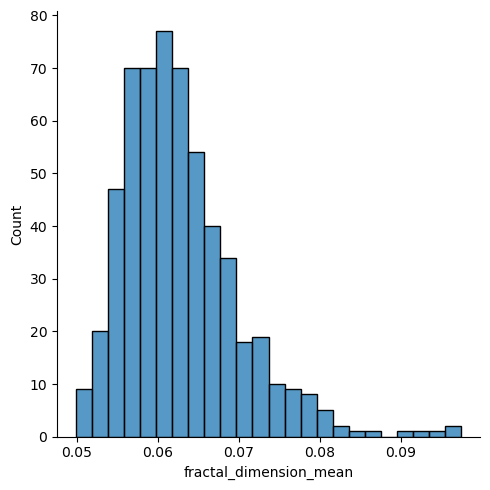

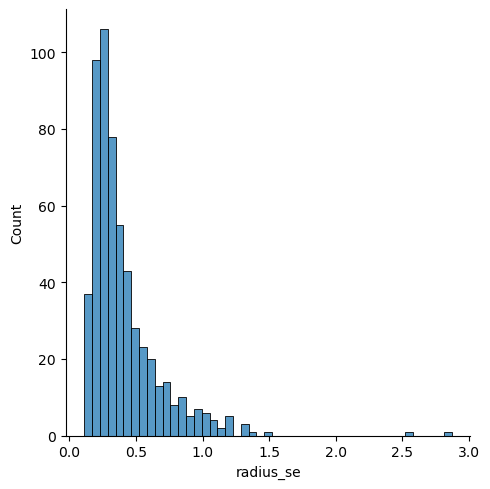

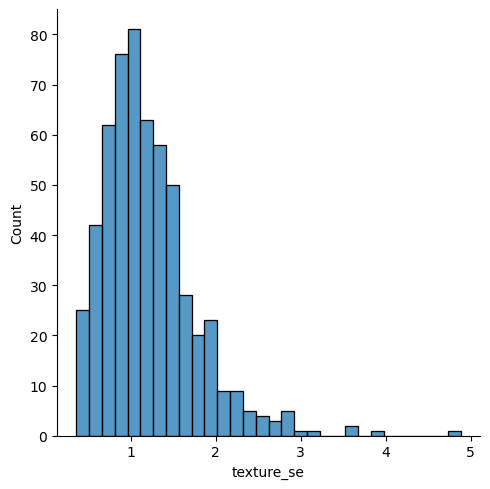

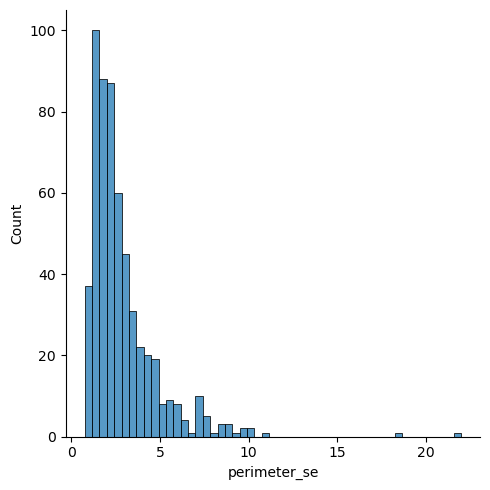

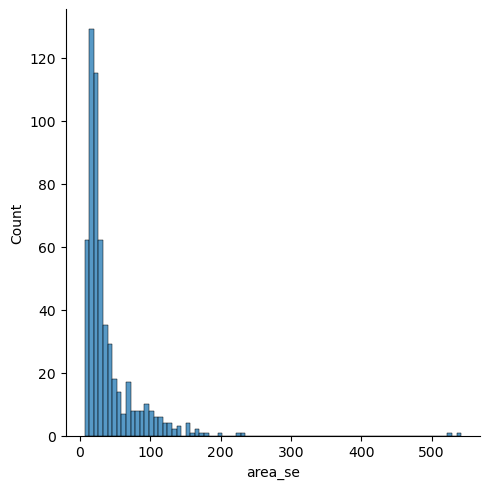

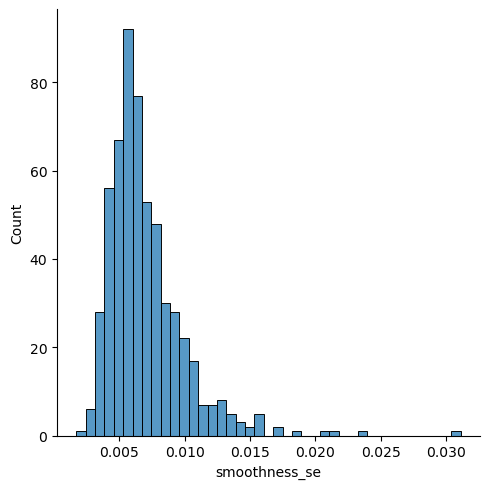

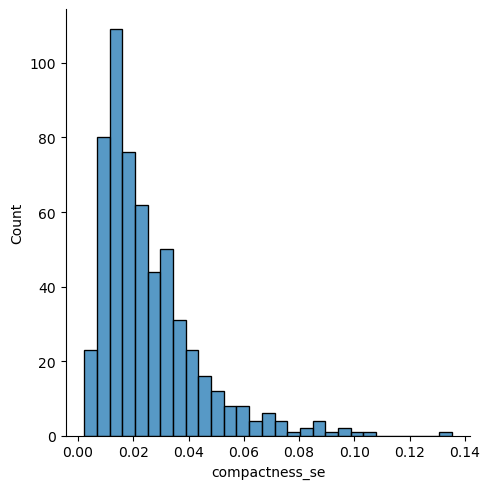

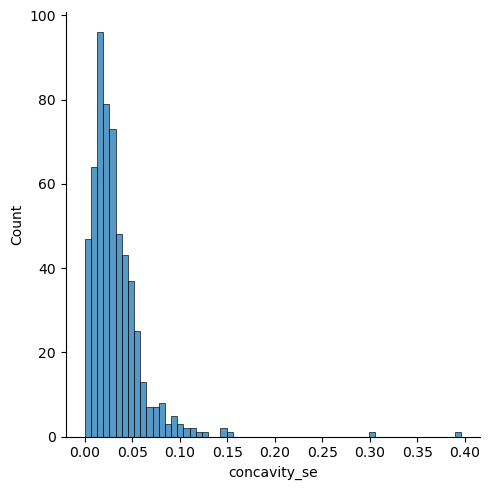

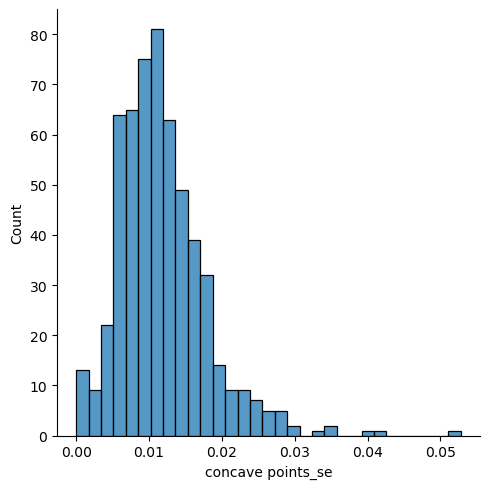

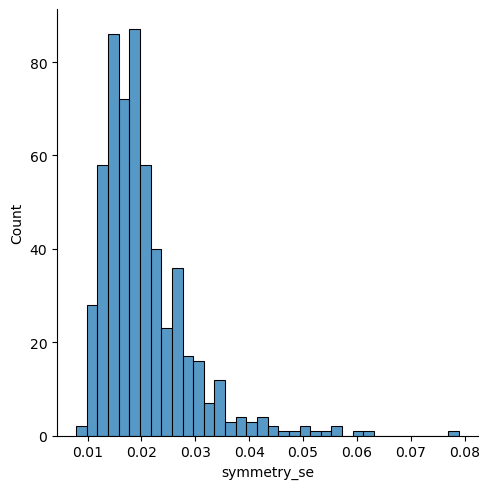

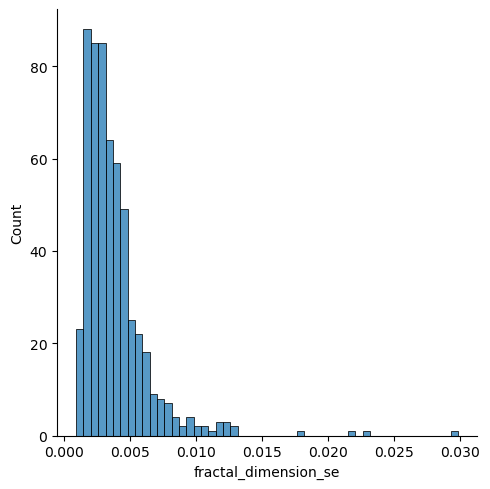

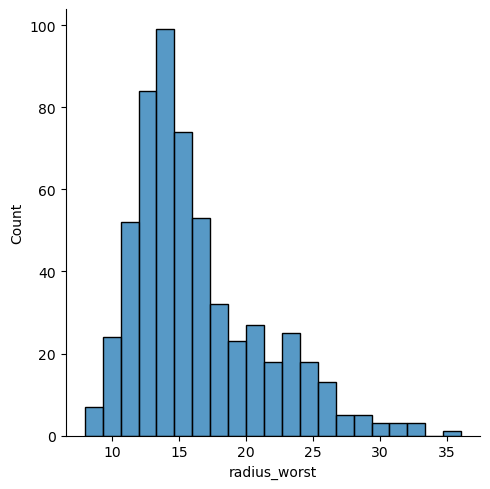

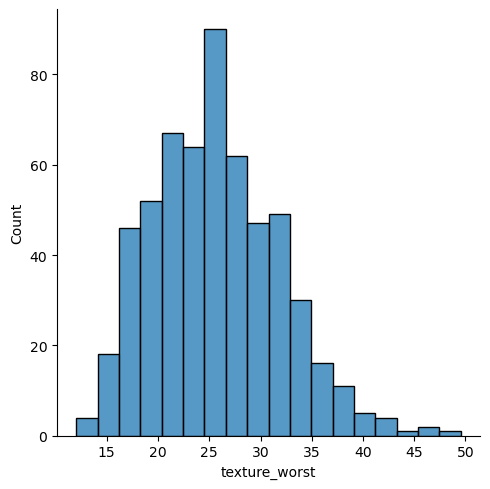

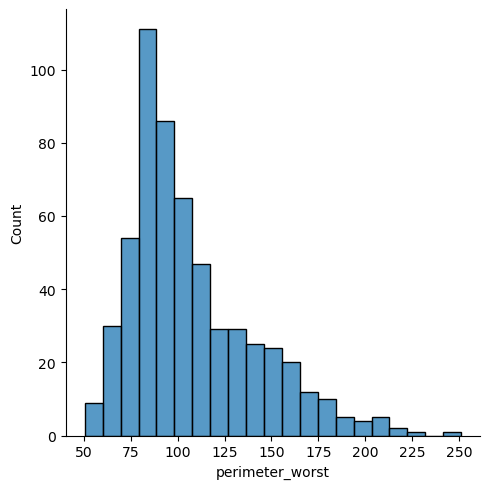

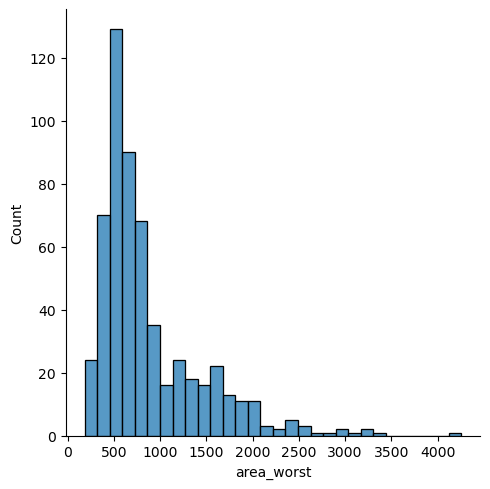

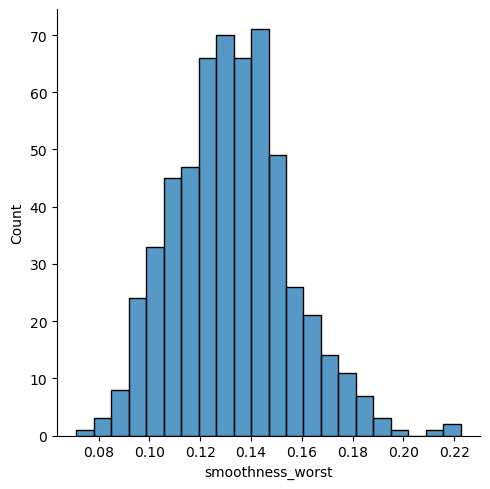

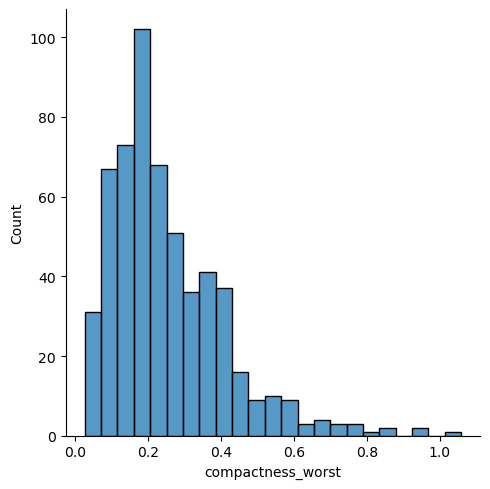

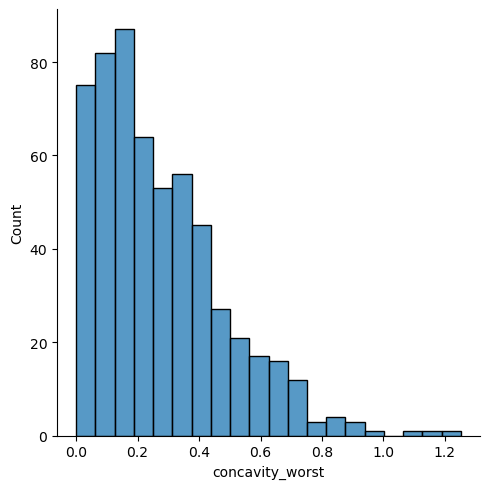

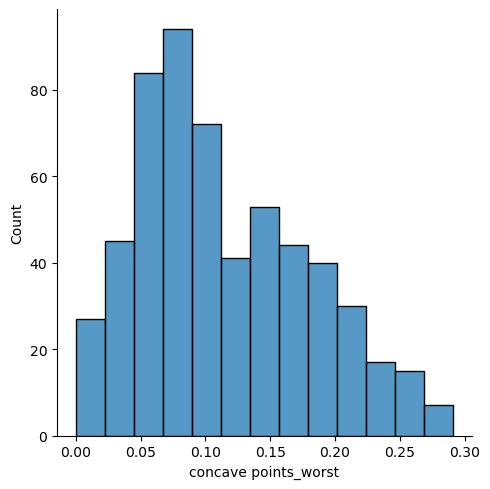

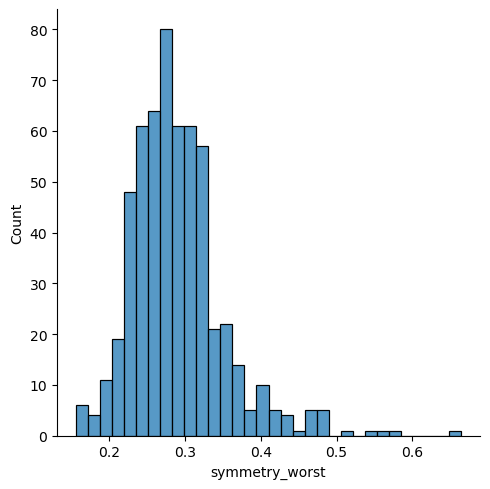

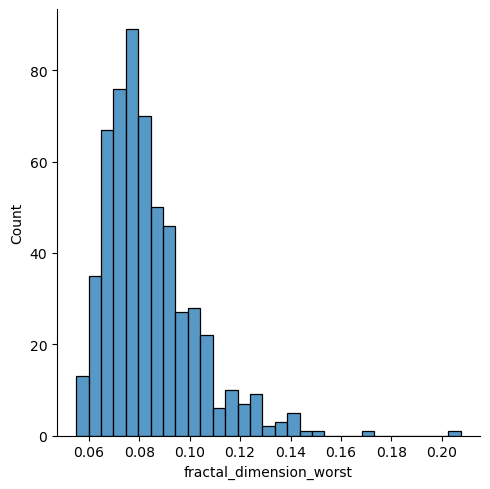

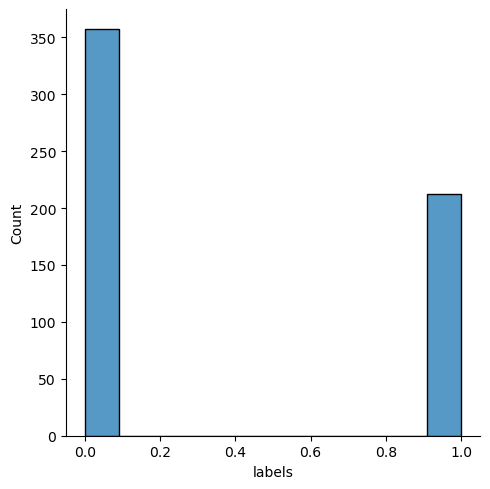

In [23]:
# creating a for loop to get the distribution plot for all columns
for column in data:
    sns.displot(x=column, data=data)

/var/folders/9t/r71p202s69q4fq8xth1nphl40000gn/T/ipykernel_20331/2945188879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.radius_mean)


<Axes: ylabel='Density'>

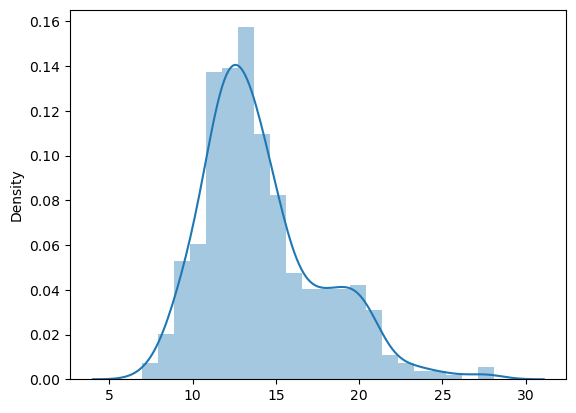

In [24]:
sns.distplot(x=data.radius_mean)

Inference about distribution: Most of the features are right skewed

# Pair Plot



Pair plot takes a lot of time if the number of features is more. So we are going to take a random sample of the original dataset to make the pairplot (Not plotting here)

In [25]:
# pair plot
#sns.pairplot(df)
#plt.show()

Scatter plot of first 2 columns

In [26]:
# Select first column of the dataframe as a series
first_column = data.iloc[:, 0]

# Select second column of the dataframe as a series
second_column = data.iloc[:, 1]

In [27]:
print(first_column)
print('-----')
print(second_column)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64
-----
0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64


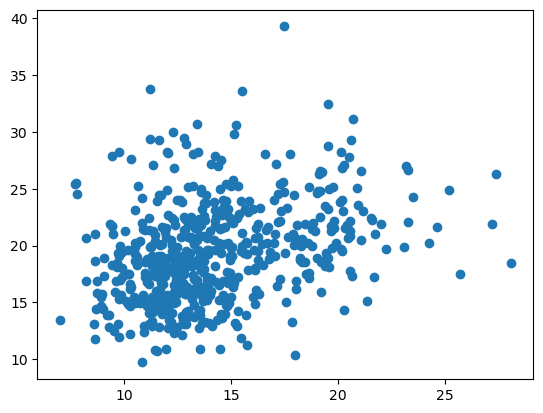

In [28]:
# let's plot a scatter plot for 1st feature vs second feature
plt.scatter(x=first_column, y=second_column)

# Outliers Detection

Box plot for visualizing the outliers in the dataset

/var/folders/9t/r71p202s69q4fq8xth1nphl40000gn/T/ipykernel_20331/1698767592.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


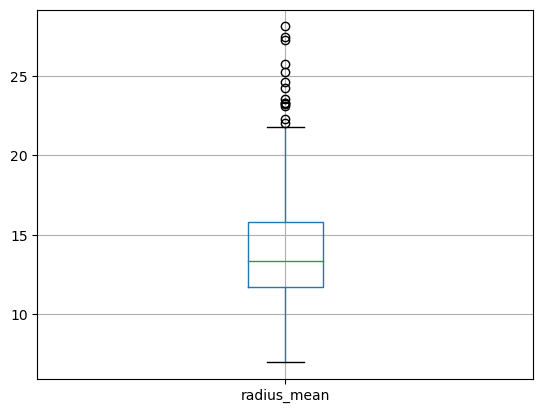

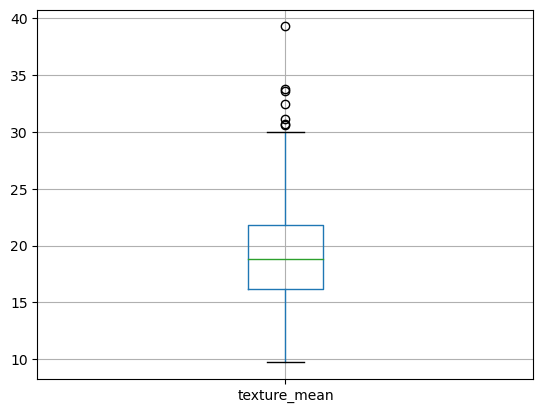

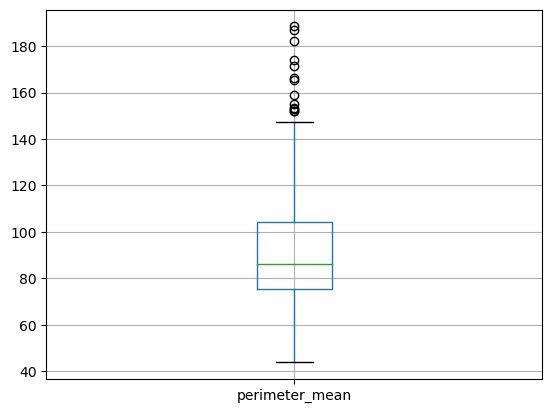

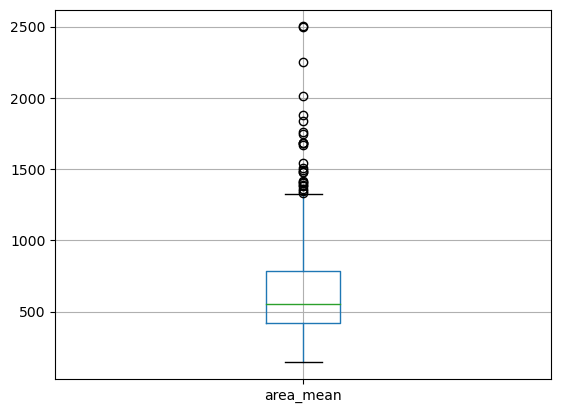

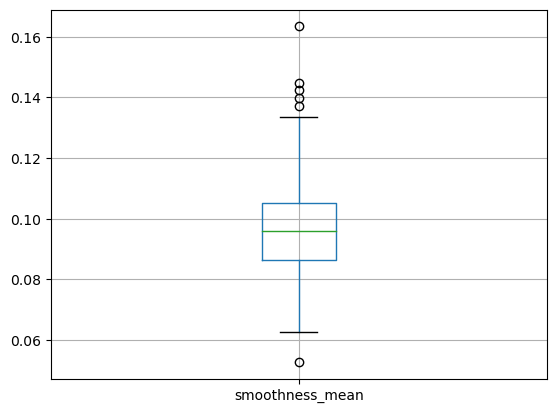

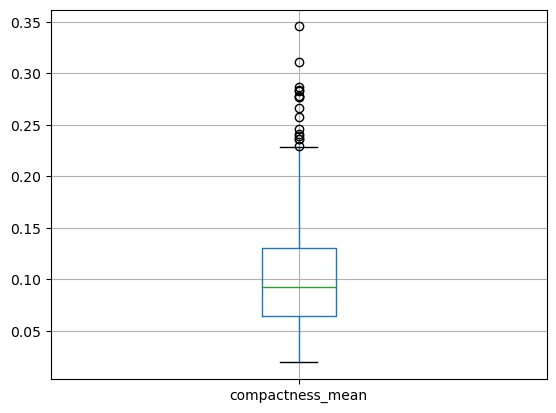

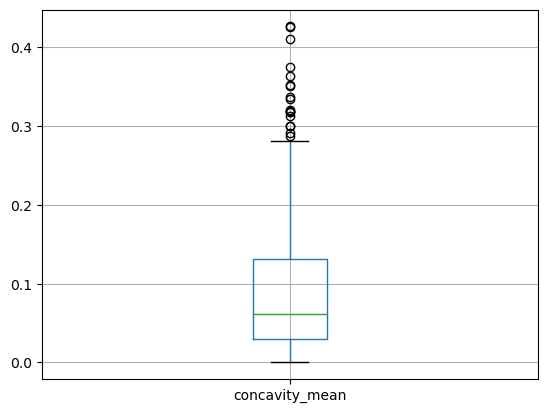

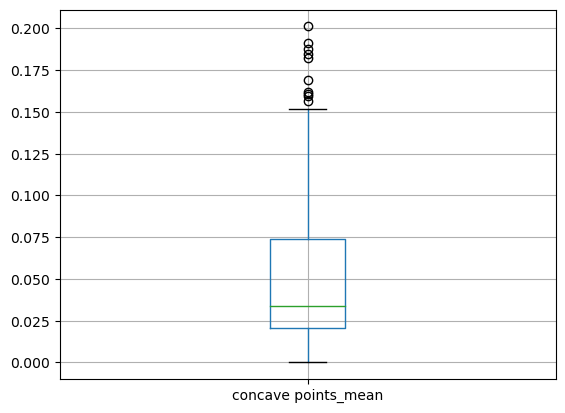

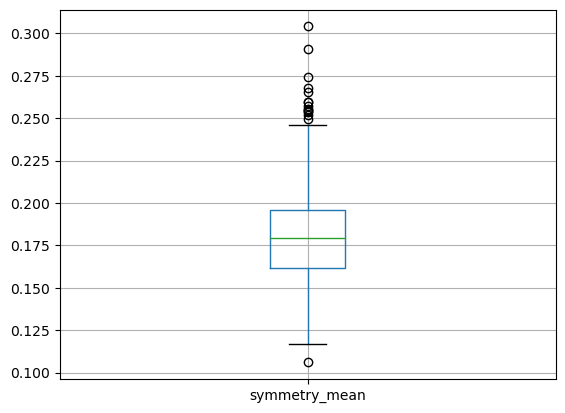

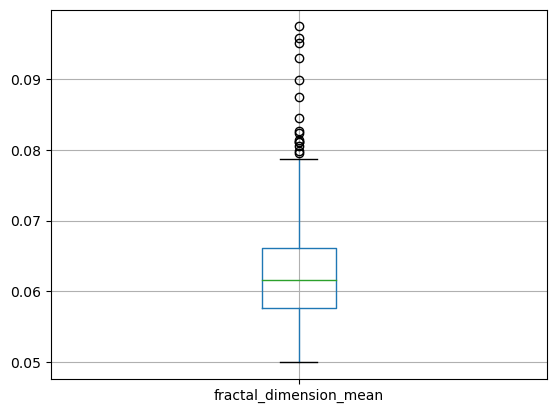

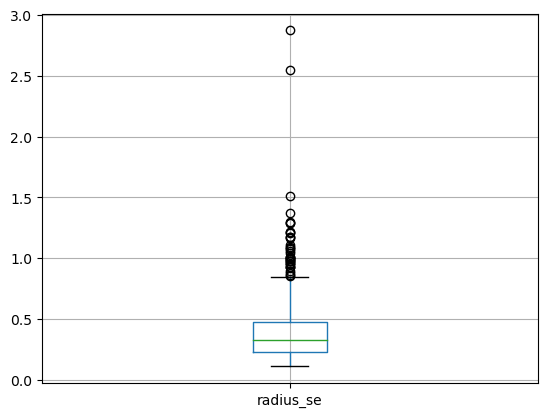

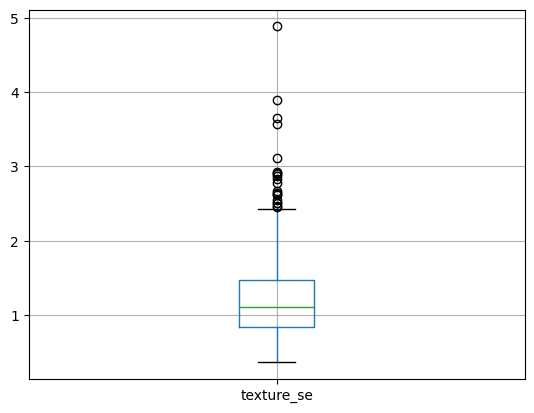

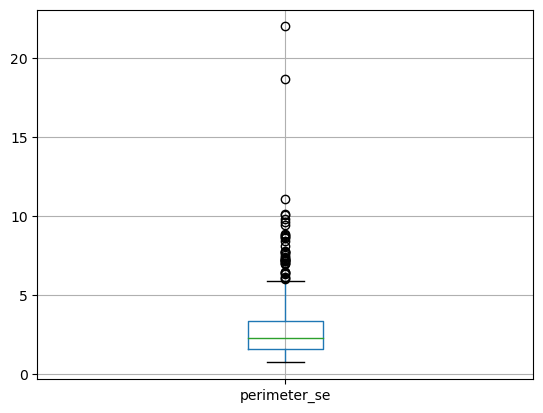

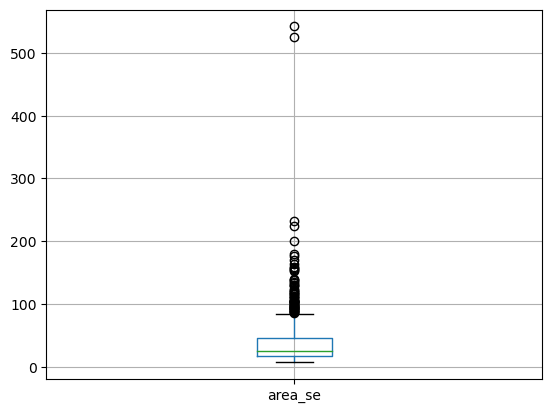

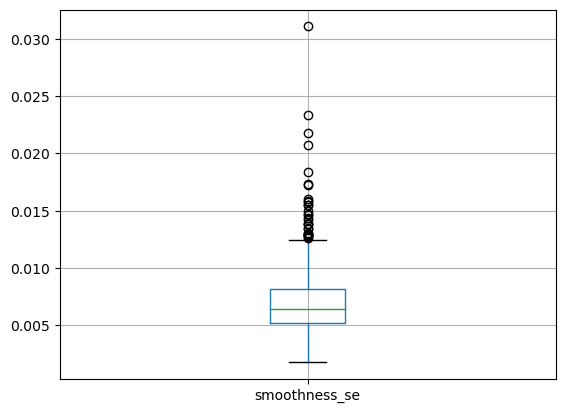

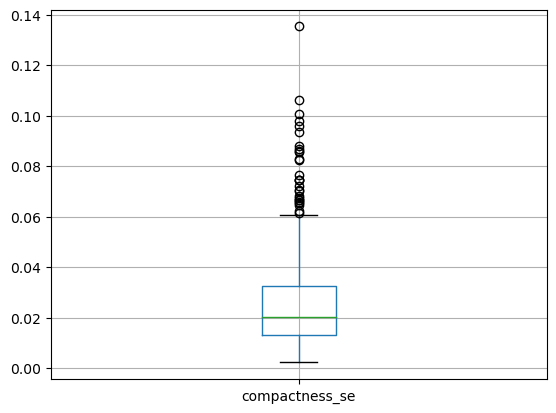

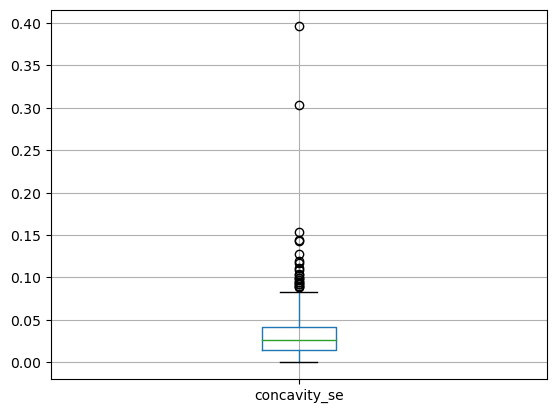

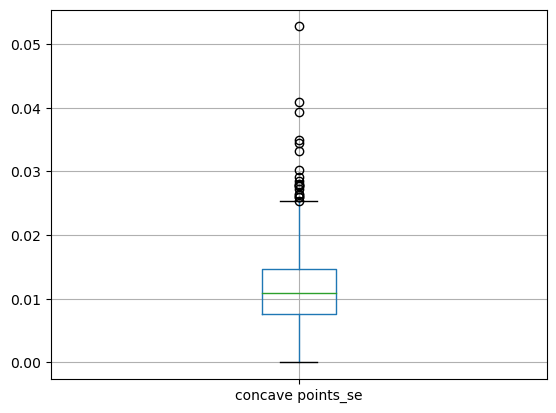

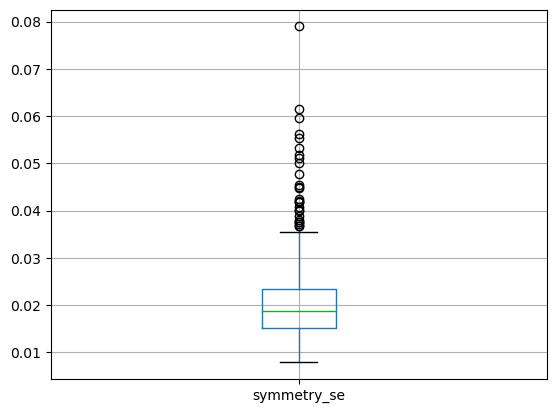

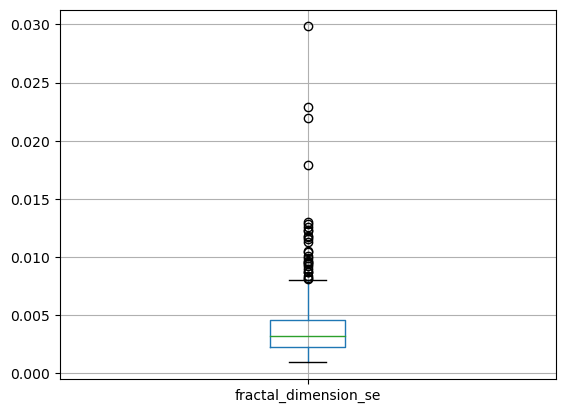

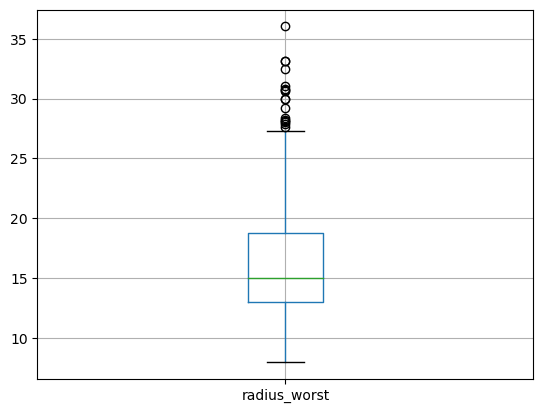

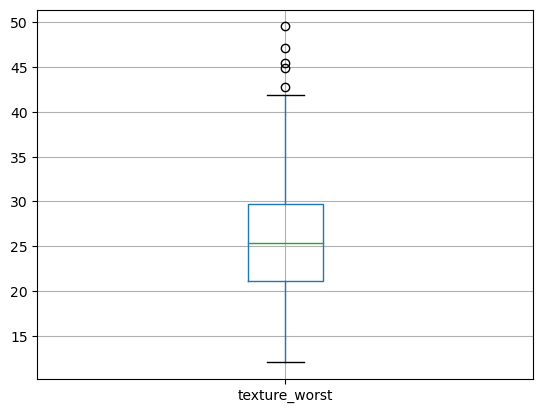

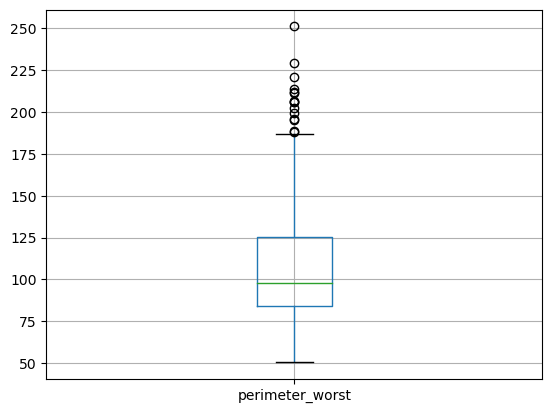

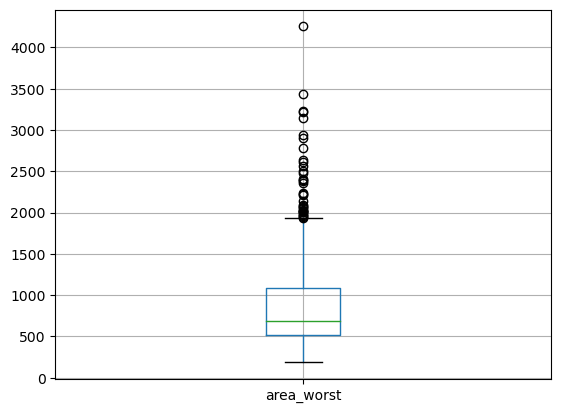

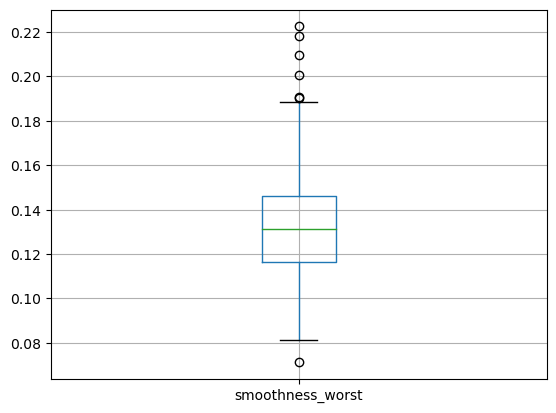

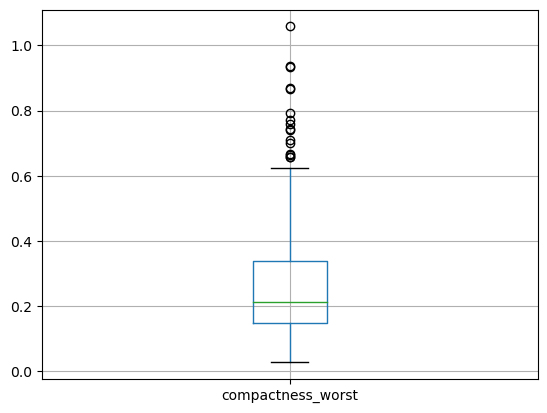

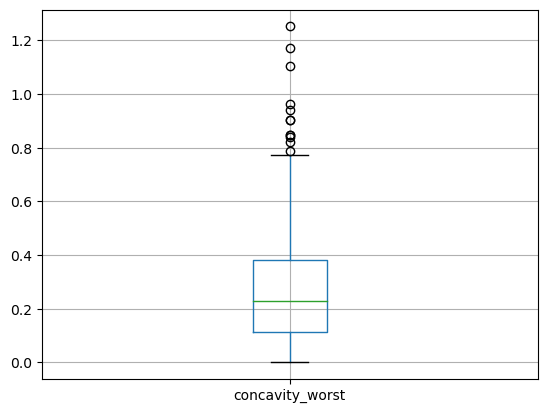

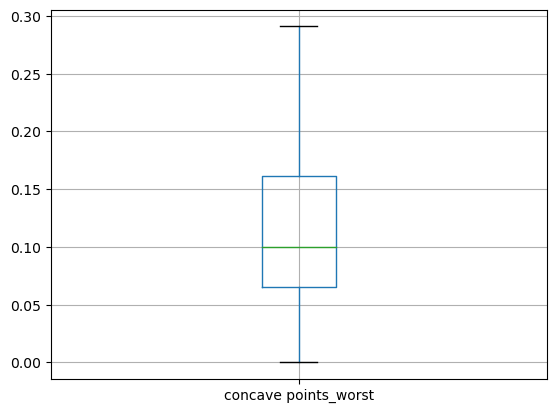

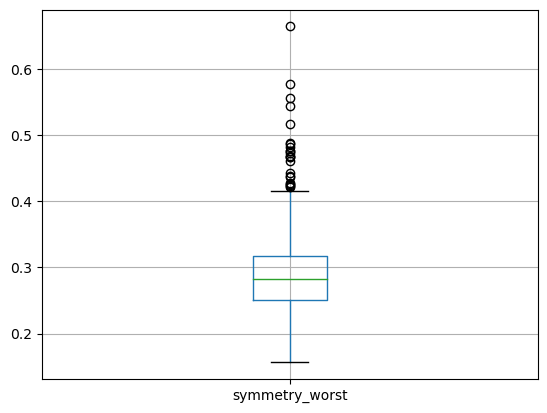

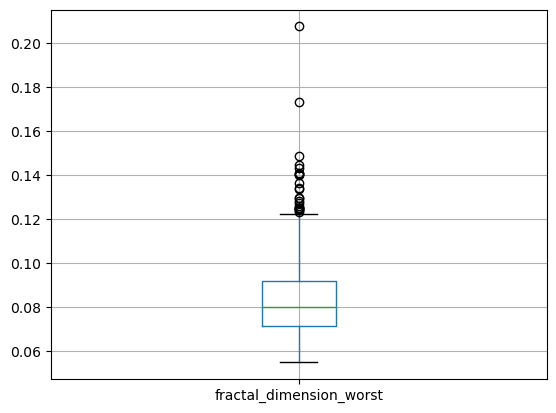

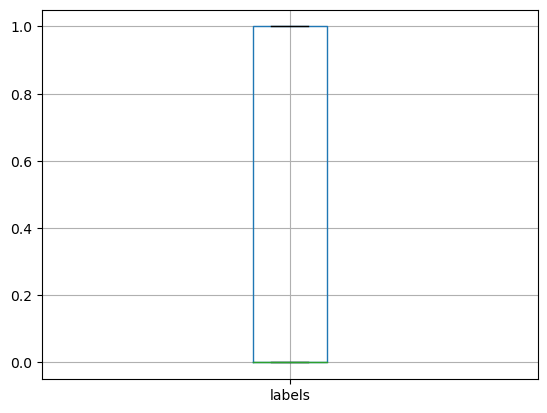

In [29]:
for column in data:
    plt.figure()
    data.boxplot([column])

As we can see here that most of the skewed features have Outliers

# Correlation Matrix

In [30]:
correlation_matrix = data.corr()

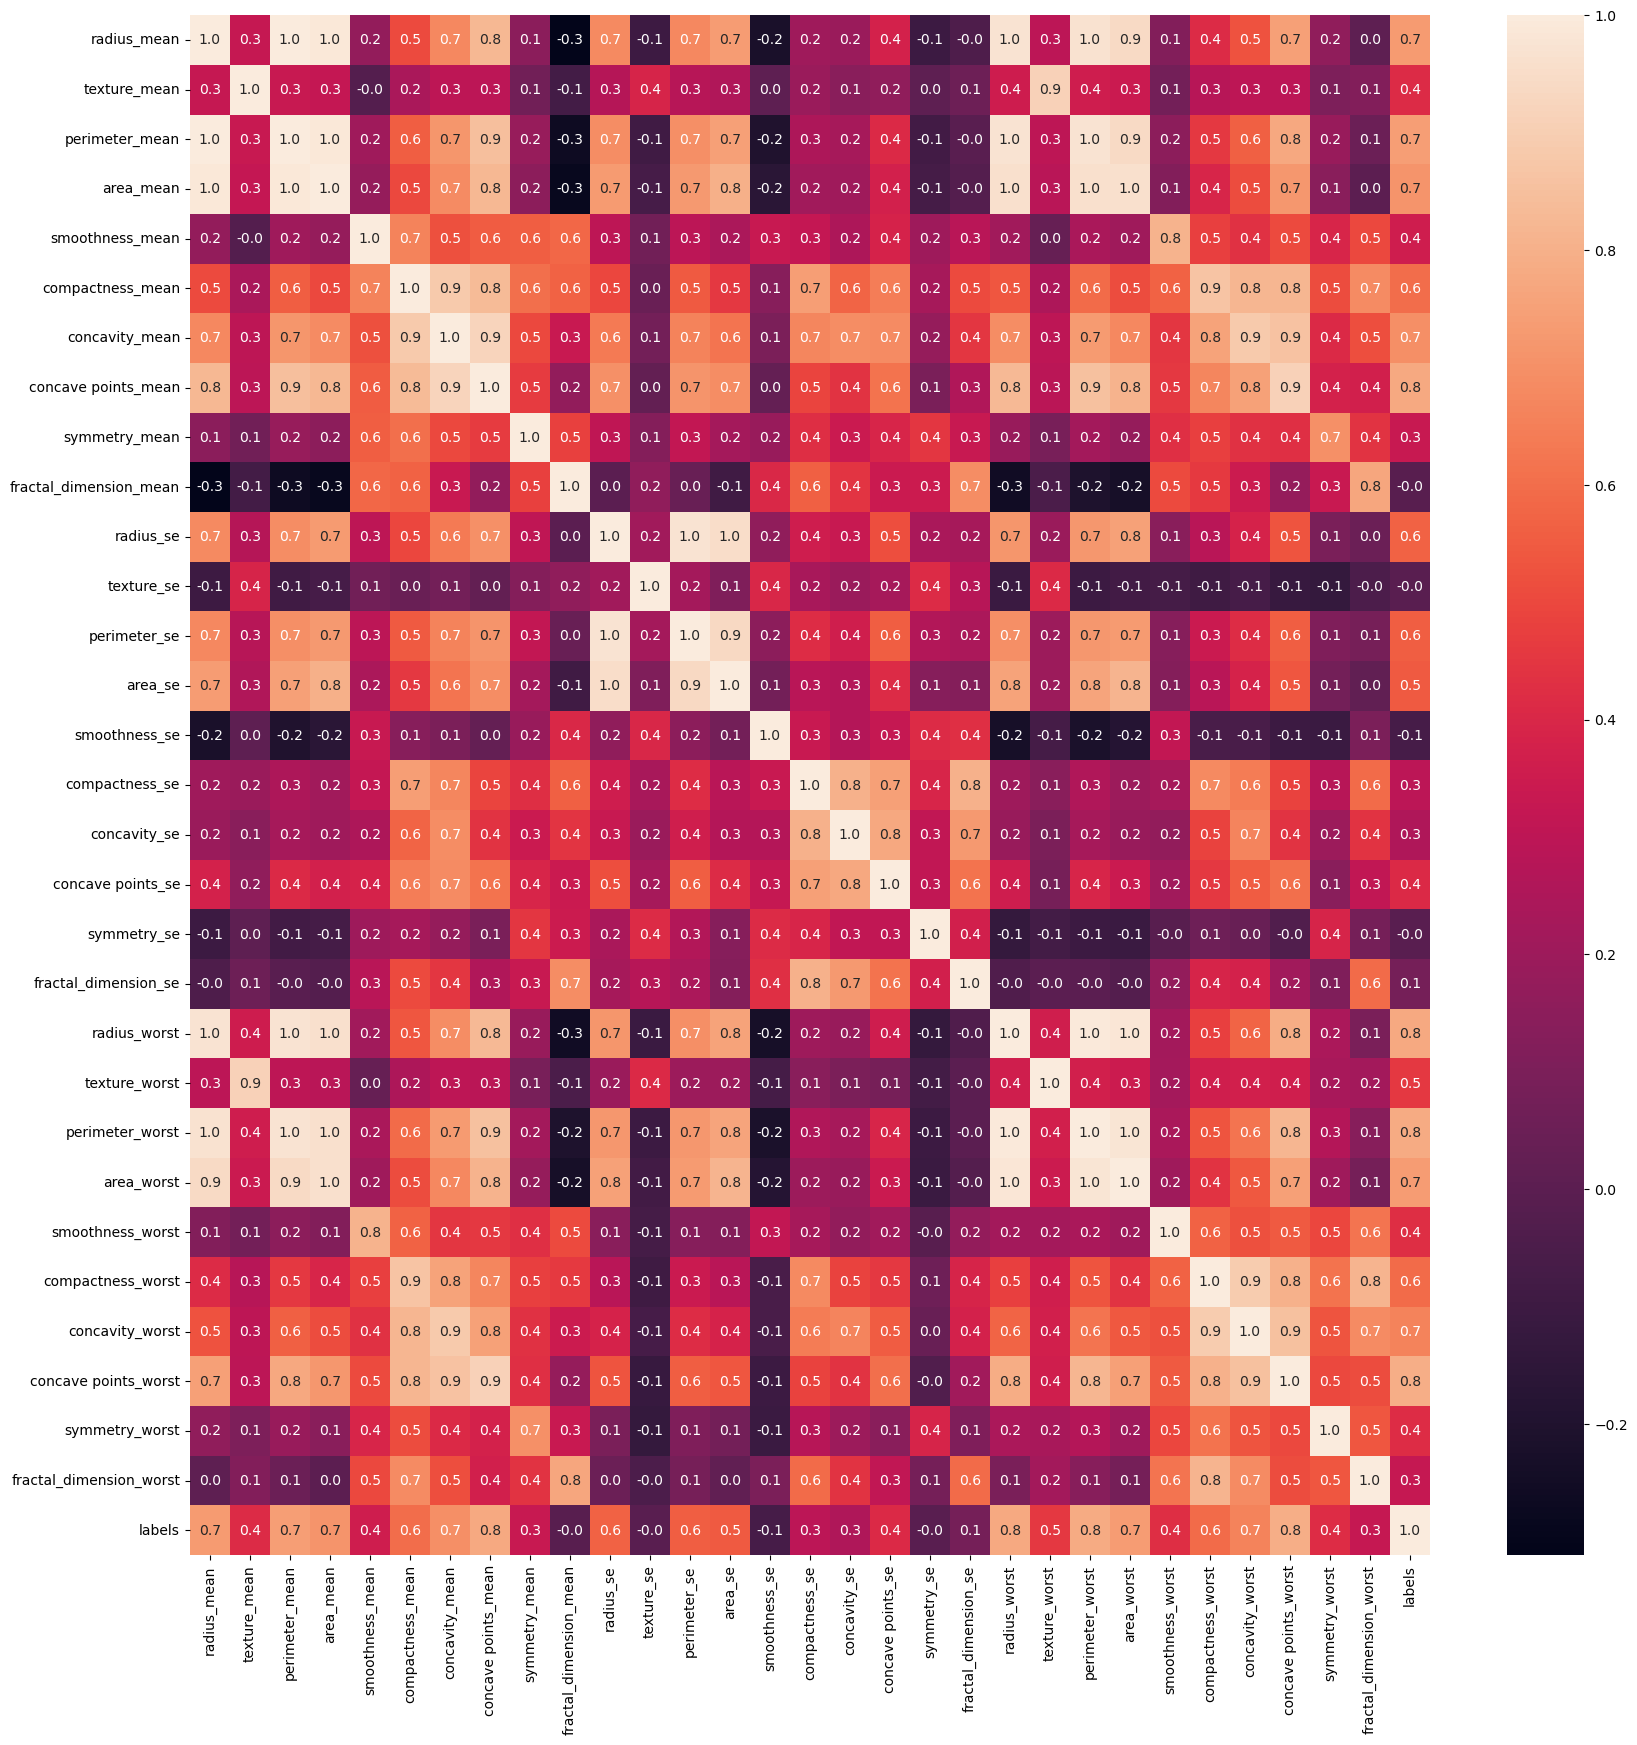

In [31]:
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True)
plt.savefig('Correlation Heat map')

Multicollinearity problem:

Multicollinearity exists when an independent variable is highly correlated with one or more independent variables

We can remove the features if they have high +ve or -ve correlation between them



Inference from EDA & Data Visualization:

No missing Values
All are continuous numerical values except for Target column
Mean is slightly more than the median for most of the features. So it is right skewed.
Slight imbalance in the dataset (Benign(0) cases are more than Malignant(1) cases
Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)
Most of the features have Outliers
Correlation Matrix reveal that most of the features are highly correlated. So we can remove certain features during Feature Selection


# SPLITTING DATA INTO FEATURES AND TARGET

In [32]:
x=data.drop(columns='labels',axis=1)
y=data['labels']

In [34]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [35]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: labels, Length: 569, dtype: int64


# TRAIN_TEST_SPLIT

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [37]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (398, 30) (171, 30)


# Standardize the data

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test)

# Building the Neural Network

In [40]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [41]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

/Users/swatilalwani/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# training the Meural Network

history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5888 - loss: 0.6983 - val_accuracy: 0.8000 - val_loss: 0.4337
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7549 - loss: 0.4714 - val_accuracy: 0.8750 - val_loss: 0.3214
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3532 - val_accuracy: 0.9000 - val_loss: 0.2617
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8926 - loss: 0.2864 - val_accuracy: 0.9250 - val_loss: 0.2257
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9338 - loss: 0.2429 - val_accuracy: 0.9500 - val_loss: 0.2009
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9379 - loss: 0.2121 - val_accuracy: 0.9500 - val_loss: 0.1826
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9424 - loss: 0.1891 - val_accuracy: 0.9500 - val_loss: 0.1686
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1710 - val_accuracy: 0.9500 - val_loss:

# Visualizing accuracy and loss

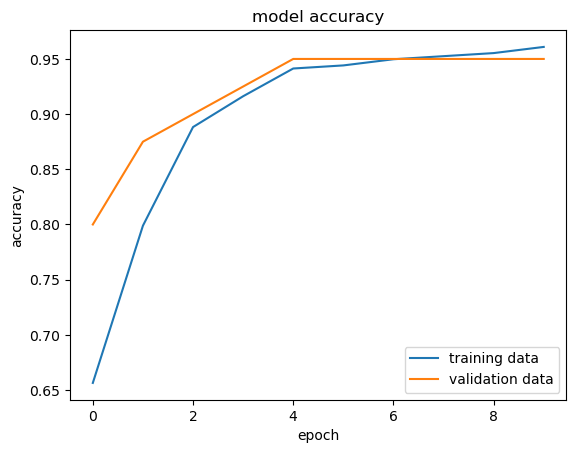

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

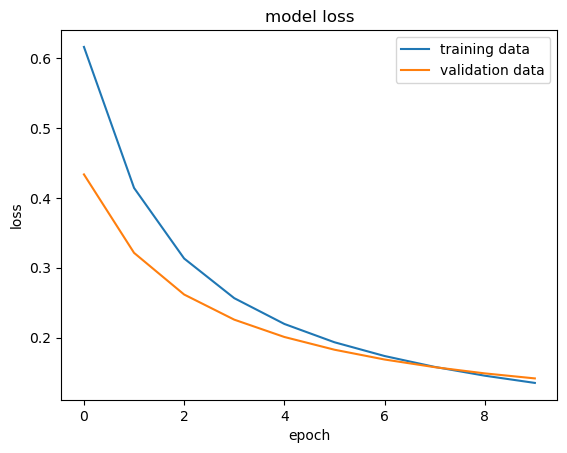

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# Accuracy of the model on test data

In [47]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1508
0.9590643048286438


In [48]:
print(x_test_std.shape)
print(x_test_std[0])

(171, 30)
[-0.03064165 -1.40905263 -0.04533245 -0.15159436  2.04738129 -0.11152619
  0.18520122  0.50694177  0.65972243  0.25993362  0.59991392  2.86518826
  0.7252122   0.15759611  0.97180277  0.38325056  0.58402977  2.91474791
 -0.39262883  0.71060836 -0.32717834 -1.69326148 -0.36711253 -0.38748116
  0.32463736 -0.76531515 -0.56583996 -0.18637835 -1.24009403 -0.63237194]


In [49]:
y_pred = model.predict(x_test_std)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [50]:
print(y_pred.shape)
print(y_pred[0])

(171, 2)
[0.61368376 0.2344223 ]


In [51]:
print(x_test_std)

[[-0.03064165 -1.40905263 -0.04533245 ... -0.18637835 -1.24009403
  -0.63237194]
 [ 0.27114352 -0.07042144  0.24316597 ...  0.55255621  0.12343229
   0.03480395]
 [-1.29458896 -0.29616025 -1.30107332 ... -1.37896262  0.28494725
  -0.29194257]
 ...
 [-0.62237728 -0.26455682 -0.6721296  ... -0.78719139 -0.17749559
  -0.54753825]
 [-0.54249297 -1.20137292 -0.54033047 ... -0.34383066 -0.3611126
   0.22745852]
 [ 0.04628399  0.25238507  0.04482331 ...  0.31871616 -0.60423512
  -0.30124691]]


In [52]:
print(y_pred)

[[6.13683760e-01 2.34422296e-01]
 [5.86364031e-01 3.98076743e-01]
 [9.82537866e-01 9.98679250e-02]
 [9.81672429e-07 7.75479972e-02]
 [5.32684743e-01 4.54333752e-01]
 [6.64040097e-04 4.72583264e-01]
 [7.79979229e-01 3.13125432e-01]
 [9.37387943e-01 1.68462664e-01]
 [9.17297125e-01 2.36608401e-01]
 [8.98217082e-01 2.40073383e-01]
 [5.41135967e-01 3.67876887e-01]
 [8.71175826e-01 4.46071029e-01]
 [8.05650175e-01 1.99798420e-01]
 [7.95505226e-01 3.17899108e-01]
 [9.61081326e-01 1.12248920e-01]
 [7.65448511e-02 7.20813811e-01]
 [9.64133322e-01 1.48389354e-01]
 [9.13723886e-01 2.04497084e-01]
 [9.28094983e-01 1.91119492e-01]
 [2.48770439e-03 1.69280395e-01]
 [6.56400740e-01 5.05604029e-01]
 [9.44642603e-01 1.50738552e-01]
 [9.18738365e-01 2.34788135e-01]
 [9.33334887e-01 1.93480656e-01]
 [6.48865700e-01 3.31400603e-01]
 [6.17538579e-03 4.42523777e-01]
 [7.68942058e-01 3.47157270e-01]
 [4.80901480e-01 4.59499002e-01]
 [1.28095048e-02 6.93732798e-01]
 [9.61392839e-03 6.44479930e-01]
 [8.785285

model.predict() gives the prediction probability of each class for that data point

In [53]:
#  argmax function

list = [0.25, 0.56]

index_of_max_value = np.argmax(list)
print(list)
print(index_of_max_value)

[0.25, 0.56]
1


In [54]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]


# Building the Detection system

In [55]:
input_data = (9.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1293,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.9691821  0.10236883]]
[0]
The tumor is Malignant


/Users/swatilalwani/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
